In [1]:
#Load dependencies
import pandas as pd
import numpy as np
from scipy.stats import ortho_group
import matplotlib.pyplot as plt

rng = np.random.RandomState(8)

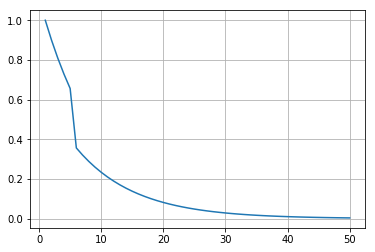

In [2]:
d = 50
gap_i = 5
eigs = [1]
val = 1
for i in range(1, gap_i):
    eigs += [0.9*eigs[i-1]]
eigs += [eigs[gap_i - 1] - 0.3]
for i in range(gap_i+1, d):
    eigs += [0.9*eigs[i-1]]

eigs = np.sort(eigs)[::-1]

# eigs = np.sort(rng.choice(np.arange(1, b), d, replace=False))[::-1]/float(b)
Lambda = np.diag(eigs)

U_star = ortho_group.rvs(d, 1, rng)
cov = np.dot(U_star, np.dot(Lambda, U_star.T))

x = np.arange(1, d+1)
plt.plot(x, eigs)
plt.grid(which='both')
plt.show()

In [3]:
def weighted_cov_sum(n, m, d, rng, k, n_vects_1):
    UU_T = np.zeros((d,d))
    UU_T_weighted = np.zeros((d, d))
    UU_T_weighted_ = np.zeros((d, d))
    for i in range(m):
        A_i = rng.multivariate_normal(np.zeros(d), cov, n).T
        X_i = np.dot(A_i, A_i.T)/n
        U_i, Sig_i, VT_i = np.linalg.svd(X_i)
        UU_T += np.dot(U_i[:, :k], U_i[:, :k].T)
        UU_T_weighted += np.dot(U_i[:, :k], np.dot(np.diag(Sig_i[:k]), U_i[:, :k].T))        
        UU_T_weighted_ += np.dot(U_i[:, :n_vects_1], np.dot(np.diag(Sig_i[:n_vects_1]), U_i[:, :n_vects_1].T))
    return UU_T/float(m),UU_T_weighted/float(m), UU_T_weighted_/float(m)

In [4]:
n_iter = 200
#n_list = np.arange(1, 1000, 50)
n_list = np.ceil(np.logspace(2, 3.5, 10)).astype(int)
# n_list = [50]
k = 3
c_1 = 3
c_2 = 5
# n_vects = int(np.minimum(N, c*k))
# n_vects_1 = c_1*k
n_vects_1 = 7
print '# of vectors: ', n_vects_1
print 'n_list: ', n_list
print

u0 = U_star[:, 0]
u1 = U_star[:, 1]
u2 = U_star[:, 2]

m = 50

u0_errs = []
u0_errs_weighted = []
u0_errs_weighted_ = []
u0_stds = []
u0_stds_weighted = []
u0_stds_weighted_ = []

u1_errs = []
u1_errs_weighted = []
u1_errs_weighted_ = []
u1_stds = []
u1_stds_weighted = []
u1_stds_weighted_ = []

u2_errs = []
u2_errs_weighted = []
u2_errs_weighted_ = []
u2_stds = []
u2_stds_weighted = []
u2_stds_weighted_ = []

# of vectors:  7
n_list:  [ 100  147  216  317  465  682 1000 1468 2155 3163]



In [5]:
for n in n_list:
    u0_err = []
    u0_err_weighted = []
    u0_err_weighted_ = []
    u1_err = []
    u1_err_weighted = []
    u1_err_weighted_ = []
    u2_err = []
    u2_err_weighted = []
    u2_err_weighted_ = []

    for i in range(n_iter):
        UU_T, UU_T_weigthed, UU_T_weighted_ = weighted_cov_sum(n, m, d, rng, k, n_vects_1)
        U, _, _ = np.linalg.svd(UU_T)
        U_weighted, _, _ = np.linalg.svd(UU_T_weigthed)
        U_weighted_, _, _ = np.linalg.svd(UU_T_weighted_)
        u0_err += [1 - np.square(np.dot(u0, U[:,0]))]
        u0_err_weighted += [1 - np.square(np.dot(u0, U_weighted[:,0]))]
        u0_err_weighted_ += [1 - np.square(np.dot(u0, U_weighted_[:,0]))]
        
        u1_err += [1 - np.square(np.dot(u1, U[:,1]))]
        u1_err_weighted += [1 - np.square(np.dot(u1, U_weighted[:,1]))]
        u1_err_weighted_ += [1 - np.square(np.dot(u1, U_weighted_[:,1]))]
        
        u2_err += [1 - np.square(np.dot(u2, U[:,2]))]
        u2_err_weighted += [1 - np.square(np.dot(u2, U_weighted[:,2]))]
        u2_err_weighted_ += [1 - np.square(np.dot(u2, U_weighted_[:,2]))]
        
    u0_errs += [np.mean(u0_err)]
    u0_errs_weighted += [np.mean(u0_err_weighted)]
    u0_errs_weighted_ += [np.mean(u0_err_weighted_)]
    u0_stds += [np.std(u0_err)]
    u0_stds_weighted += [np.std(u0_err_weighted)]
    u0_stds_weighted_ += [np.std(u0_err_weighted_)]
    
    u1_errs += [np.mean(u1_err)]
    u1_errs_weighted += [np.mean(u1_err_weighted)]
    u1_errs_weighted_ += [np.mean(u1_err_weighted_)]
    u1_stds += [np.std(u1_err)]
    u1_stds_weighted += [np.std(u1_err_weighted)]
    u1_stds_weighted_ += [np.std(u1_err_weighted_)]
    
    u2_errs += [np.mean(u2_err)]
    u2_errs_weighted += [np.mean(u2_err_weighted)]
    u2_errs_weighted_ += [np.mean(u2_err_weighted_)]
    u2_stds += [np.std(u2_err)]
    u2_stds_weighted += [np.std(u2_err_weighted)]
    u2_stds_weighted_ += [np.std(u2_err_weighted_)]
    
    print 'n = ', n, ' done.'
    
    print 'u0_err = ', np.mean(u0_err), ' std = ', np.std(u0_err)
    print 'u0_err_weighted = ', np.mean(u0_err_weighted), ' std_weighted = ', np.std(u0_err_weighted)
    print 'u0_err_weighted_  = ', np.mean(u0_err_weighted_), ' std_weighted_ = ', np.std(u0_err_weighted_)
    
    print 'u1_err = ', np.mean(u1_err), ' std = ', np.std(u1_err)
    print 'u1_err_weighted = ', np.mean(u1_err_weighted), ' std_weighted = ', np.std(u1_err_weighted)
    print 'u1_err_weighted_  = ', np.mean(u1_err_weighted_), ' std_weighted_ = ', np.std(u1_err_weighted_)
    
    print 'u2_err = ', np.mean(u2_err), ' std = ', np.std(u2_err)
    print 'u2_err_weighted = ', np.mean(u2_err_weighted), ' std_weighted = ', np.std(u2_err_weighted)
    print 'u2_err_weighted_  = ', np.mean(u2_err_weighted_), ' std_weighted_ = ', np.std(u2_err_weighted_)
    print

n =  100  done.
u0_err =  0.07143959078042462  std =  0.07984740324918013
u0_err_weighted =  0.0370879533463156  std_weighted =  0.037481996353356084
u0_err_weighted_  =  0.027870439863529578  std_weighted_ =  0.028343694598489576
u1_err =  0.10449160945206205  std =  0.1048436405830047
u1_err_weighted =  0.0618669877561905  std_weighted =  0.06653045880948692
u1_err_weighted_  =  0.04803256105239633  std_weighted_ =  0.0477760018131312
u2_err =  0.07818627281424367  std =  0.07789691163162275
u2_err_weighted =  0.058861257911147845  std_weighted =  0.06028225386072759
u2_err_weighted_  =  0.04769393621340619  std_weighted_ =  0.04548784425005285

n =  147  done.
u0_err =  0.04467972765752057  std =  0.06599609161419585
u0_err_weighted =  0.02065496442786952  std_weighted =  0.02258827690676725
u0_err_weighted_  =  0.015625896903069224  std_weighted_ =  0.0158047341158249
u1_err =  0.06245110878514987  std =  0.07368309446398866
u1_err_weighted =  0.034022885309621026  std_weighted =  

In [16]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

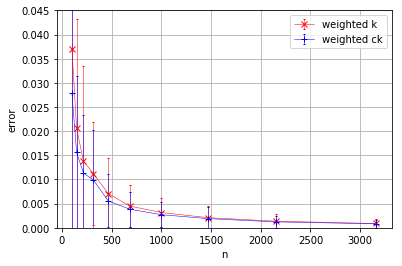

In [21]:
#plot 1
x = len(u0_errs_weighted_)
x_axis = n_list[: x]
plt.errorbar(x_axis, u0_errs_weighted, u0_stds_weighted, capsize=1, c='r', lw=0.5, marker='x', label='weighted k')
plt.errorbar(x_axis, u0_errs_weighted_, u0_stds_weighted_, capsize=1, c='b', lw=0.5, marker='+', label='weighted ck')
plt.ylim(0, 0.045)
plt.legend()

plt.xlabel('n')
plt.ylabel('error')

plt.grid(which='both')
plt.show()

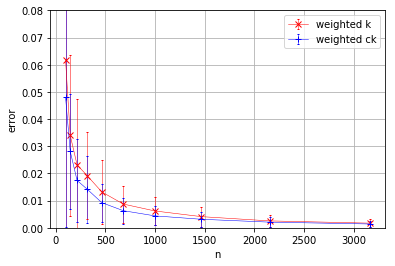

In [22]:
#plot 1
x = len(u1_errs_weighted_)
x_axis = n_list[: x]
plt.errorbar(x_axis, u1_errs_weighted, u1_stds_weighted, capsize=1, c='r', lw=0.5, marker='x', label='weighted k')
plt.errorbar(x_axis, u1_errs_weighted_, u1_stds_weighted_, capsize=1, c='b', lw=0.5, marker='+', label='weighted ck')
plt.ylim(0, 0.08)
plt.legend()

plt.xlabel('n')
plt.ylabel('error')

plt.grid(which='both')
plt.show()

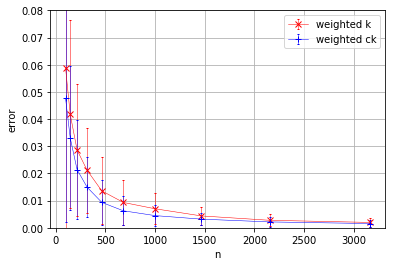

In [84]:
#plot 1
x = len(u2_errs_weighted_)
x_axis = n_list[: x]
plt.errorbar(x_axis, u2_errs_weighted, u2_stds_weighted, capsize=1, c='r', lw=0.5, marker='x', label='weighted k')
plt.errorbar(x_axis, u2_errs_weighted_, u2_stds_weighted_, capsize=1, c='b', lw=0.5, marker='+', label='weighted ck')
plt.ylim(0, 0.08)

plt.legend()

plt.xlabel('n')
plt.ylabel('error')

plt.grid(which='both')
plt.show()

In [177]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
# Remove horizontal space between axes
# fig.subplots_adjust(hspace=0)

In [178]:
axs[0].errorbar(x_axis, u0_errs_weighted, u0_stds_weighted, capsize=1, c='r', lw=0.5, marker='x', label='k=3')
axs[0].errorbar(x_axis, u0_errs_weighted_, u0_stds_weighted_, capsize=1, c='b', lw=0.5, marker='+', label='k=7')
axs[0].set_ylim(0, 0.045)
axs[0].legend()
axs[0].set_xlabel('n')
axs[0].set_ylabel('error')
axs[0].grid(which='both')

axs[1].errorbar(x_axis, u1_errs_weighted, u1_stds_weighted, capsize=1, c='r', lw=0.5, marker='x', label='k=3')
axs[1].errorbar(x_axis, u1_errs_weighted_, u1_stds_weighted_, capsize=1, c='b', lw=0.5, marker='+', label='k=7')
axs[1].set_ylim(0, 0.08)
axs[1].legend()
axs[1].set_xlabel('n')
axs[1].set_ylabel('error')
axs[1].grid(which='both')

axs[2].errorbar(x_axis, u2_errs_weighted, u2_stds_weighted, capsize=1, c='r', lw=0.5, marker='x', label='k=3')
axs[2].errorbar(x_axis, u2_errs_weighted_, u2_stds_weighted_, capsize=1, c='b', lw=0.5, marker='+', label='k=7')
axs[2].set_ylim(0, 0.08)
axs[2].legend()
axs[2].set_xlabel('n')
axs[2].set_ylabel('error')
axs[2].grid(which='both')

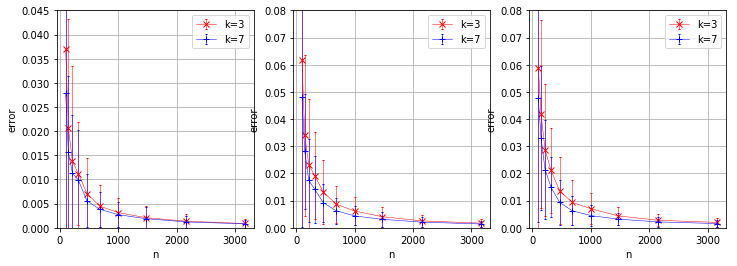

In [176]:
plt.show()

In [179]:
plt.savefig('synthetic-top-3.pdf')